In [8]:
import numpy as np
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pl.read_csv('../../DATA/gene_expression.csv')

In [3]:
df

Gene One,Gene Two,Cancer Present
f64,f64,i64
4.3,3.9,1
2.5,6.3,0
5.7,3.9,1
6.1,6.2,0
7.4,3.4,1
…,…,…
5.0,6.5,1
3.4,6.6,0
2.7,6.5,0


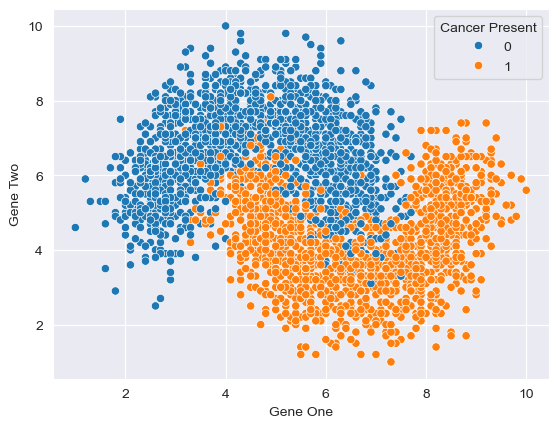

In [5]:
sns.scatterplot(data=df,x='Gene One', y='Gene Two', hue='Cancer Present')
plt.show()

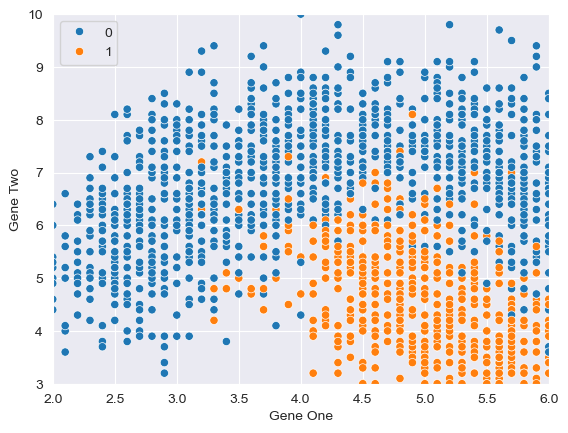

In [6]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present')
plt.xlim(2, 6)
plt.ylim(3, 10)
plt.legend(loc='upper left')

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.select(cs.exclude('Cancer Present'))
y = df['Cancer Present']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaled_X_train = scaler.fit_transform(X_train)

In [14]:
scaled_X_test = scaler.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [17]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
full_test = pl.concat([X_test, y_test.to_frame()], how='horizontal')

In [26]:
full_test

Gene One,Gene Two,Cancer Present
f64,f64,i64
7.7,4.1,1
5.3,2.8,1
8.9,4.2,1
3.3,5.7,0
4.7,7.3,0
…,…,…
5.0,6.1,1
2.3,4.6,0
8.2,6.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

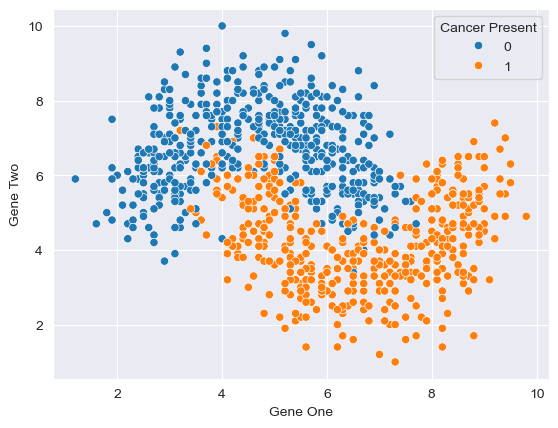

In [27]:
sns.scatterplot(data=full_test, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.7)

In [28]:
y_pred = knn_model.predict(scaled_X_test)

In [35]:
pl.DataFrame(y_pred, schema=y_test.to_frame().schema)

Cancer Present
i64
1
1
1
0
0
…
0
0
1


In [36]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [37]:
accuracy_score(y_test, y_pred)

0.9011111111111111

In [44]:
confusion_matrix(y_test, y_pred)

array([[426,  44],
       [ 45, 385]], dtype=int64)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



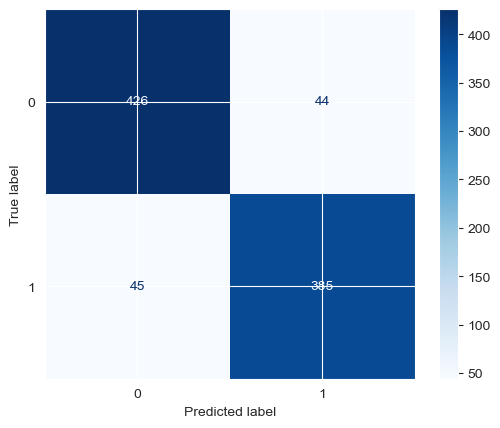

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

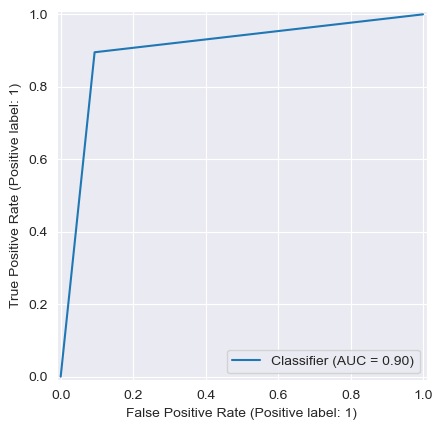

In [48]:
RocCurveDisplay.from_predictions(y_test, y_pred)

In [49]:
test_error_rates = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)

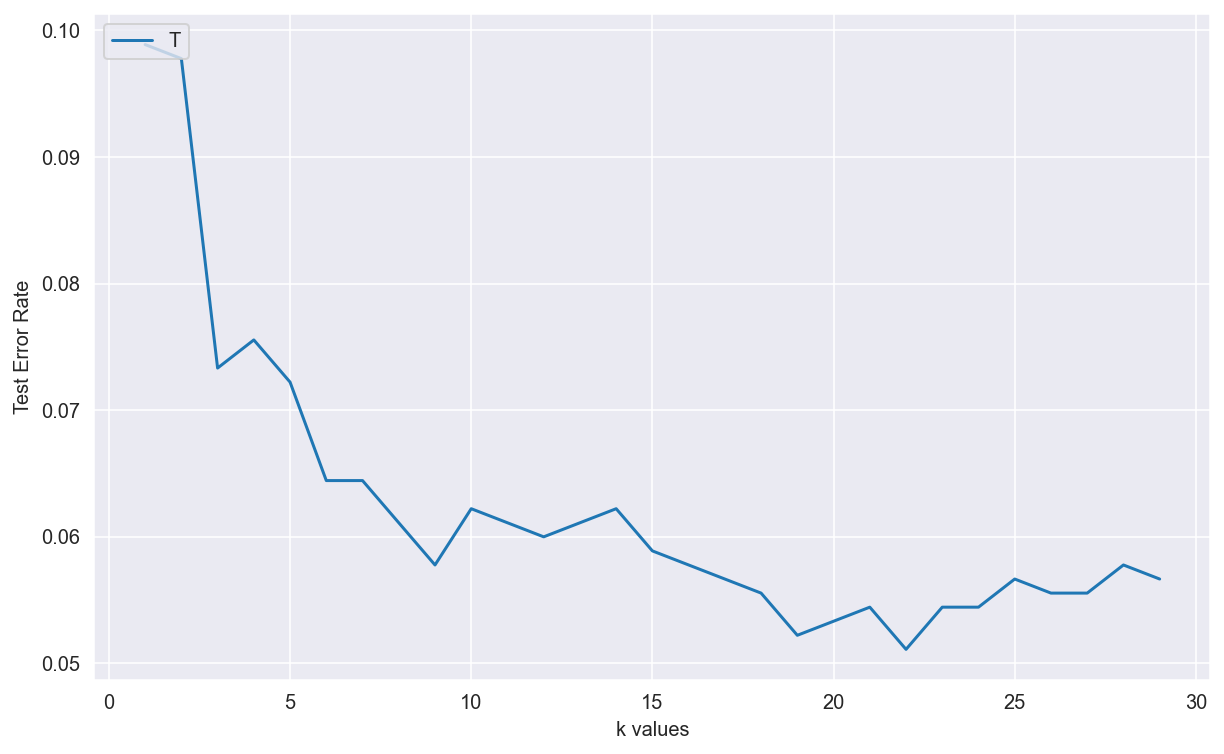

In [54]:
plt.figure(figsize=(10, 6), dpi=144)
plt.plot(range(1, 30), test_error_rates)
plt.ylabel('Test Error Rate')
plt.xlabel('k values')
plt.legend('Test Error Rate', loc='upper left')
plt.show()

In [55]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
knn_model = KNeighborsClassifier()

In [60]:
knn_model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [61]:
operations = [('scaler', scaler), ('knn', knn_model)]

In [62]:
from sklearn.pipeline import Pipeline

In [63]:
pipe = Pipeline(operations)

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
k_values = list(range(1, 30))

In [66]:
k_values

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [67]:
param_grid = {'knn__n_neighbors': k_values}

In [68]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [69]:
full_cv_classifier.fit(scaled_X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [71]:
full_cv_classifier.best_params_

{'knn__n_neighbors': 20}

In [72]:
full_cv_classifier.cv_results_

{'mean_fit_time': array([0.00180249, 0.00120325, 0.0016099 , 0.00120063, 0.00209155,
        0.00179992, 0.00160213, 0.00123239, 0.00140104, 0.00160542,
        0.00136509, 0.00110183, 0.0010005 , 0.00192723, 0.00170102,
        0.00131669, 0.00100021, 0.00160499, 0.00161433, 0.00172319,
        0.00160232, 0.00140343, 0.00141559, 0.00127311, 0.00120134,
        0.00139923, 0.00170259, 0.00151219, 0.00170441]),
 'std_fit_time': array([3.92582740e-04, 3.98238894e-04, 3.70660359e-04, 3.99256507e-04,
        7.28755809e-04, 7.48864318e-04, 4.90238052e-04, 4.64558782e-04,
        4.91365701e-04, 4.87496180e-04, 4.49643828e-04, 2.01304395e-04,
        2.85545443e-06, 2.11401741e-04, 3.99461876e-04, 7.54949449e-04,
        1.09153015e-06, 4.93070336e-04, 4.73648928e-04, 6.29012406e-04,
        4.89722617e-04, 4.91078581e-04, 4.81461527e-04, 3.90317659e-04,
        3.99618569e-04, 4.89823817e-04, 3.98435822e-04, 4.60517211e-04,
        6.01444792e-04]),
 'mean_score_time': array([0.01252575, 

In [73]:
pl.DataFrame(full_cv_classifier.cv_results_)

mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
f64,f64,f64,f64,i32,struct[1],f64,f64,f64,f64,f64,f64,f64,i32
0.001802,0.000393,0.012526,0.001098,1,{1},0.895238,0.890476,0.902381,0.916667,0.914286,0.90381,0.01028,29
0.001203,0.000398,0.012215,0.00024,2,{2},0.911905,0.892857,0.911905,0.916667,0.904762,0.907619,0.008303,28
0.00161,0.000371,0.012153,0.000648,3,{3},0.92381,0.909524,0.916667,0.921429,0.930952,0.920476,0.007159,26
0.001201,0.000399,0.012207,0.000378,4,{4},0.909524,0.902381,0.911905,0.92619,0.914286,0.912857,0.007766,27
0.002092,0.000729,0.023133,0.007492,5,{5},0.930952,0.907143,0.919048,0.935714,0.928571,0.924286,0.010146,22
…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.001201,0.0004,0.01342,0.000429,25,{25},0.940476,0.907143,0.928571,0.930952,0.930952,0.927619,0.011025,13
0.001399,0.00049,0.013463,0.000602,26,{26},0.940476,0.907143,0.921429,0.935714,0.930952,0.927143,0.011819,18
0.001703,0.000398,0.013082,0.000329,27,{27},0.940476,0.907143,0.930952,0.930952,0.933333,0.928571,0.011269,6


In [75]:
pl.DataFrame(full_cv_classifier.cv_results_['mean_test_score'])

column_0
f64
0.90381
0.907619
0.920476
0.912857
0.924286
…
0.927619
0.927143
0.928571


In [76]:
scaler = StandardScaler()

In [77]:
knn20 = KNeighborsClassifier(n_neighbors=20)

In [78]:
operations = [('scaler', scaler), ('knn', knn20)]

In [79]:
pipe = Pipeline(operations)

In [80]:
pipe.fit(scaled_X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=20))])

In [82]:
pipe_pred = pipe.predict(scaled_X_test)

In [84]:
pl.DataFrame(pipe_pred, schema=y_test.to_frame().schema)

Cancer Present
i64
1
1
1
0
0
…
1
0
1


In [85]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [86]:
accuracy_score(y_test, pipe_pred)

0.9466666666666667

In [87]:
print(classification_report(y_test, pipe_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900

